<a href="https://colab.research.google.com/github/harry84523/maingit/blob/master/%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98%E5%BC%8F%E6%97%85%E5%AE%BFface_recognition%E6%87%89%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#主題:
##無人全人臉辨識式旅宿

現今飯店及旅館大都是以大量人員給予來住宿之顧客服務，給予房卡，行李保管，帶路等等，非常消耗人力資源也造成公司大量的人事開銷，此專案想使用
deep_face的功能模擬一個人臉辨識系統，讓旅館以人臉辨識認證為主軸，實現無人或只需少數人員的全人臉辨識旅館

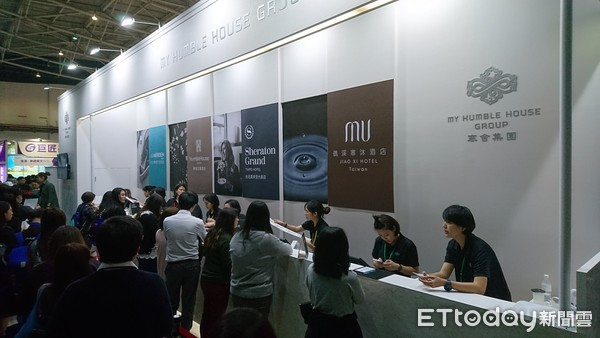

在旅遊旺季時，飯店需要很多人力消耗前來的旅客

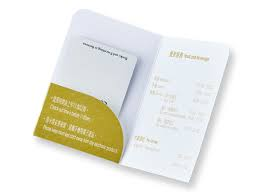

* 房卡有許多麻煩不便之處，如需分配給顧客，容易遺失
* 客人出門時容易忘記將其帶出.....等等

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. 載入需要的套件

In [ ]:
!pip install face-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gradio

In [ ]:
!pip install deepface

In [ ]:
from deepface import DeepFace
from face_engine import FaceEngine
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import cv2
import dlib
import cv2
import imutils

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
import pandas as pd
import numpy as np

##2.定義開啟攝開機函式

In [ ]:
js = Javascript('''
  async function takePhoto(quality) {
    const div = document.createElement('div');
    const capture = document.createElement('button');
    capture.textContent = '拍攝';
    div.appendChild(capture);
    const video = document.createElement('video');
    video.style.display = 'block';
    const stream = await navigator.mediaDevices.getUserMedia({video: true});
    document.body.appendChild(div);
    div.appendChild(video);
    video.srcObject = stream;
    await video.play();
    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    await new Promise((resolve) => capture.onclick = resolve);
    const canvas = document.createElement('canvas');
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    canvas.getContext('2d').drawImage(video, 0, 0);
    stream.getVideoTracks()[0].stop();
    div.remove();
    return canvas.toDataURL('image/jpeg', quality);
  }
  ''')

##3. 用gradio 模擬入住系統介面讓使用者輸入人數及入住天數

In [ ]:
import gradio as gr


def sentence_builder(peoplecount, day):
    global people
    if peoplecount=='1個人':
      people=1
    elif peoplecount=='2個人':
      people=2
    elif peoplecount=='3個人':
      people=3
    elif peoplecount=='4個人':
      people=4
    if day == '1天':
      time=1
    elif day == '2天':
      time=2
    elif day == '3天':
      time=3
    elif day == '4天':
      time=4    
    price=people*time*1000    

    return f"""your cost: {price}"""
    #return f"""The {quantity} {animal}s went to the {place} where they {" and ".join(activity_list)} until the {"morning" if morning else "night"}"""


demo = gr.Interface(
    sentence_builder,
    [
        #gr.Slider(1, 4),
        gr.Dropdown(["1個人", "2個人", "3個人", "4個人"]),
        gr.Dropdown(["1天", "2天", "3天", "4天"]),
        #gr.Radio(["park", "zoo", "road"]),
        #gr.CheckboxGroup(["ran", "swam", "ate", "slept"]),
        #gr.Checkbox(label="Is it the morning?"),
    ],
    "text"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://48968.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


##4. 將旅客的人臉存檔，作為入房時進房的認證，如果旅客有1人及拍攝一次，如果有3個人及拍攝三次

In [ ]:
df=pd.DataFrame()
memberlist=[]
namelist=[]
emaillist=[]
sexlist=[]
identitycard_list=[]
for i in range(1,people+1): 
  display(js)    
  data = eval_js('takePhoto({})'.format(0.8))
  binary = b64decode(data.split(',')[1])
  filename =f"person{i}.jpg"
  with open(filename, 'wb') as f:
    f.write(binary)
  
  name = input('請輸入姓名: ')
  email = input('請輸入您請輸入您的email: ')
  sex = input('請輸入您的性別: ')
  identitycard = input('請輸入您的身分證字號: ') 
  
  memberlist.append(filename)
  namelist.append(name)
  emaillist.append(email)
  sexlist.append(sex)
  identitycard_list.append(identitycard)

df['name']=namelist
df['email']=emaillist
df['sex']=sexlist
df['identitycard']=identitycard_list
df['picture']=memberlist

In [ ]:
df

,name,email,sex,identitycard,picture
0,賴偉成,ww@gmail.com,男,gg,person1.jpg
1,王浩瑜,hhhhh@gmail.com,lkf;sl,sd;lfk,person2.jpg


確認剛剛的辨識是否成功抓取人臉

In [ ]:
import os 
os.chdir("/content")
os.getcwd()

'/content'

In [ ]:
import glob
import re
pat =re.compile(r"1")
targetFile = f"*.jpg"
allFile_JPG = glob.glob(targetFile)

In [ ]:
allFile_JPG

['person1.jpg', 'person2.jpg']

In [ ]:
from google.colab.patches import cv2_imshow

293
94
473
273


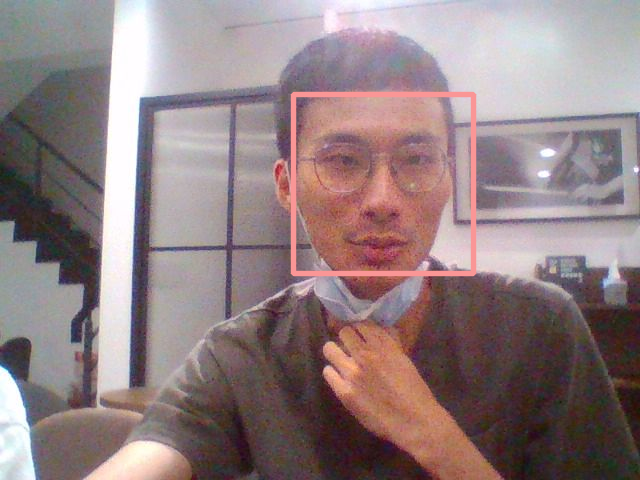

234
154
413
333


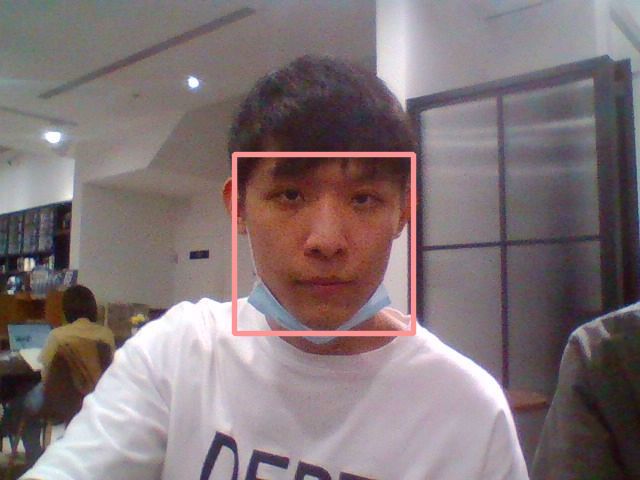

In [ ]:
for i in range(len(allFile_JPG)):  
  img=imutils.resize(cv2.imread(allFile_JPG[i]), width=640)
  detector =dlib.get_frontal_face_detector()
  face_rects = detector(img, 0)
  for i, d in enumerate(face_rects):
    x1 = d.left()
    print(x1)
    y1 = d.top()
    print(y1)
    x2 = d.right()
    print(x2)
    y2 = d.bottom()
    print(y2)
    # 以方框標示偵測的人臉
    cv2.rectangle(img, (x1, y1), (x2, y2), (150, 150, 250), 4, cv2.LINE_AA)

    cv2_imshow(img)

##5. 再做一次拍攝作人臉驗證，如果認證通過，則印出歡迎旅客之字樣 

## 有偵測到符合身分房客

<IPython.core.display.Javascript object>

person1.jpg: True
person2.jpg: False
歡迎進入
['賴偉成'] [[344 128 493 277]]
type object 'Image' has no attribute 'open'


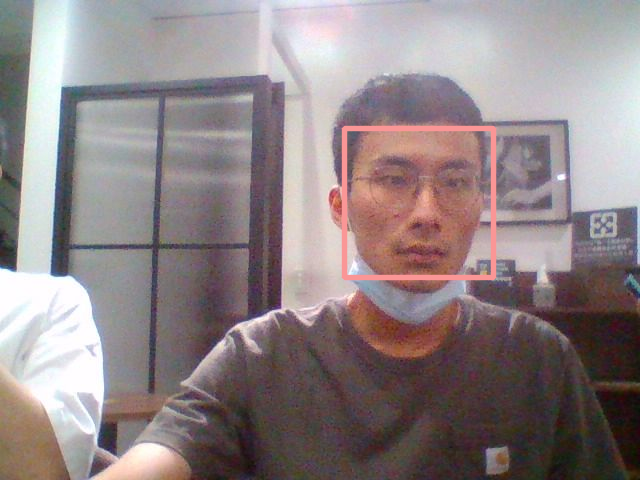

In [ ]:
display(js)
data = eval_js('takePhoto({})'.format(0.8))
binary = b64decode(data.split(',')[1])
filename ="login.jpg"
with open(filename, 'wb') as f:
    f.write(binary)

keyopen=[]
for i in memberlist:     
  result = DeepFace.verify(filename, i, model_name='DeepFace', model=DeepFace.build_model('DeepFace'), enforce_detection=False)
  print(f'{i}:' ,result["verified"])
  if result["verified"]:     
    keyopen.append('ok')
if keyopen!=[]:  
  print('歡迎進入')
else:
  print('您不是本房房客!')
engine = FaceEngine()
imglist=[]
namelist=[]
for i in range(len(memberlist)):
  globals()['img'+str(i+1)]=memberlist[i]
  globals()['name'+str(i+1)]=df[df['picture']==memberlist[i]]['name'][i]
  imglist.append(globals()['img'+str(i+1)])
  namelist.append(globals()['name'+str(i+1)])

engine.fit(imglist, namelist)
try:
  testimage = 'login.jpg' 
  boxes, names = engine.make_prediction(testimage)
  print(names, boxes)
  img = Image.open(testimage)
  drawing = ImageDraw.Draw(img)
  for i in range(len(boxes)):
      drawing.rectangle(((boxes[i][0], boxes[i][1]), (boxes[i][2], boxes[i][3])), outline='green', width=2)
  plt.imshow(img)
  plt.show()
except Exception as ex:
  errorimage=cv2.imread('login.jpg')
  print(ex)
  detector =dlib.get_frontal_face_detector()
  #偵測人臉
  face_rects, scores, idx = detector.run(errorimage, 0, 0)
  for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    # 以方框標示偵測的人臉
    cv2.rectangle(errorimage, (x1, y1), (x2, y2), (150, 150, 250), 4, cv2.LINE_AA)
  # 顯示結果
  #cv2.imshow("Face Detection",img)
  cv2_imshow(errorimage)

## 沒有偵測到符合身分房客

<IPython.core.display.Javascript object>

person1.jpg: False
person2.jpg: False
您不是本房房客!



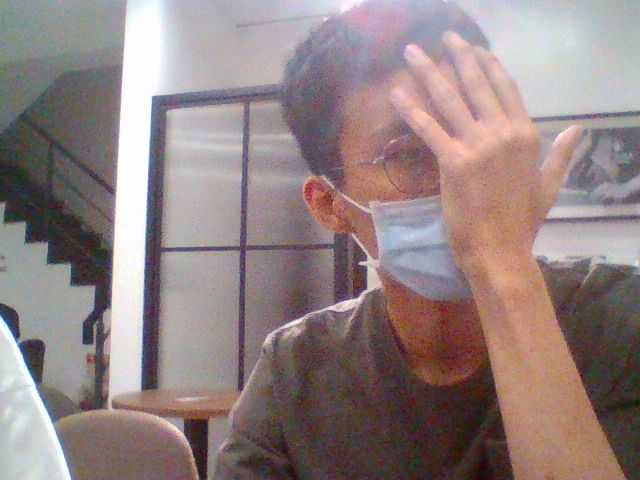

In [ ]:
display(js)
data = eval_js('takePhoto({})'.format(0.8))
binary = b64decode(data.split(',')[1])
filename ="login.jpg"
with open(filename, 'wb') as f:
    f.write(binary)

keyopen=[]
for i in memberlist:  
  
   
  result = DeepFace.verify(filename, i, model_name='DeepFace', model=DeepFace.build_model('DeepFace'), enforce_detection=False)
  print(f'{i}:' ,result["verified"])
  if result["verified"]:     
    keyopen.append('ok')
if keyopen!=[]:  
  print('歡迎進入')
else:
  print('您不是本房房客!')
engine = FaceEngine()
imglist=[]
namelist=[]
for i in range(len(memberlist)):
  globals()['img'+str(i+1)]=memberlist[i]
  globals()['name'+str(i+1)]=df[df['picture']==memberlist[i]]['name'][i]
  imglist.append(globals()['img'+str(i+1)])
  namelist.append(globals()['name'+str(i+1)])

engine.fit(imglist, namelist)
try:
  testimage = 'login.jpg' 
  boxes, names = engine.make_prediction(testimage)
  print(names, boxes)
  img = Image.open(testimage)
  drawing = ImageDraw.Draw(img)
  for i in range(len(boxes)):
      drawing.rectangle(((boxes[i][0], boxes[i][1]), (boxes[i][2], boxes[i][3])), outline='green', width=2)
  plt.imshow(img)
  plt.show()
except Exception as ex:
  errorimage=cv2.imread('login.jpg')
  print(ex)
  detector =dlib.get_frontal_face_detector()
  #偵測人臉
  face_rects, scores, idx = detector.run(errorimage, 0, 0)
  for i, d in enumerate(face_rects):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    # 以方框標示偵測的人臉
    cv2.rectangle(errorimage, (x1, y1), (x2, y2), (150, 150, 250), 4, cv2.LINE_AA)
  # 顯示結果
  #cv2.imshow("Face Detection",img)
  cv2_imshow(errorimage)
